<a href="https://colab.research.google.com/github/ghania68-Ab/Machine-Learning-Project/blob/main/San_Francisco_Crime_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Upload files test.csv and train.csv

In [ ]:
from google.colab import files

uploaded = files.upload()  # This will open a file picker


Saving test.csv to test.csv


In [ ]:
from google.colab import files

uploaded = files.upload()  # This will open a file picker


Saving train.csv to train.csv


Step 2 — Import libraries & load train.csv
The column Dates has the exact date and time of each crime.

Other columns: Category (crime type), DayOfWeek, PdDistrict, Resolution, Address, X, Y

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load train data
train = pd.read_csv('train.csv', parse_dates=['Dates'])  # Dates is the date-time column
train.head()


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


Step 3 — Create a simple daily count (time-series)

Since we just want date + count, we can do:
Now daily_counts has two columns:
DateOnly | count

Perfect for plotting or forecasting

In [ ]:
# Group by date only (ignore time)
train['DateOnly'] = train['Dates'].dt.date

# Count number of crimes per day
daily_counts = train.groupby('DateOnly').size().reset_index(name='count')
daily_counts.head()


,DateOnly,count
0,2003-01-06,400
1,2003-01-07,418
2,2003-01-08,528
3,2003-01-09,417
4,2003-01-10,399


Step 4 — Plot daily crime counts:
You’ll see spikes, trends, maybe some seasonal patterns.

This is exactly what we use for time-series forecasting.

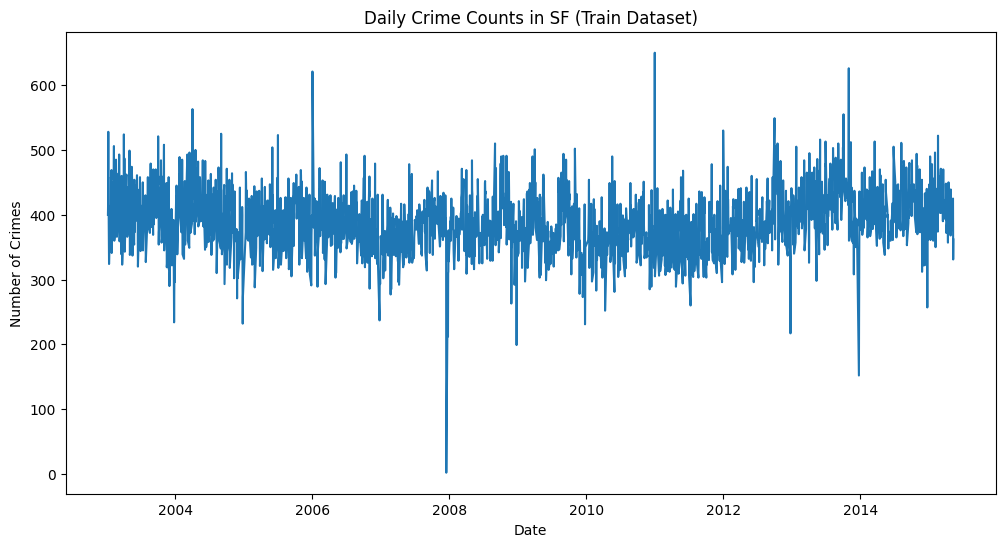

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(daily_counts['DateOnly'], daily_counts['count'])
plt.title('Daily Crime Counts in SF (Train Dataset)')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.show()


Step 5 — (Optional) Weekly aggregation:
Weekly aggregation smooths out noise

Super useful for ARIMA / Prophet / ML models

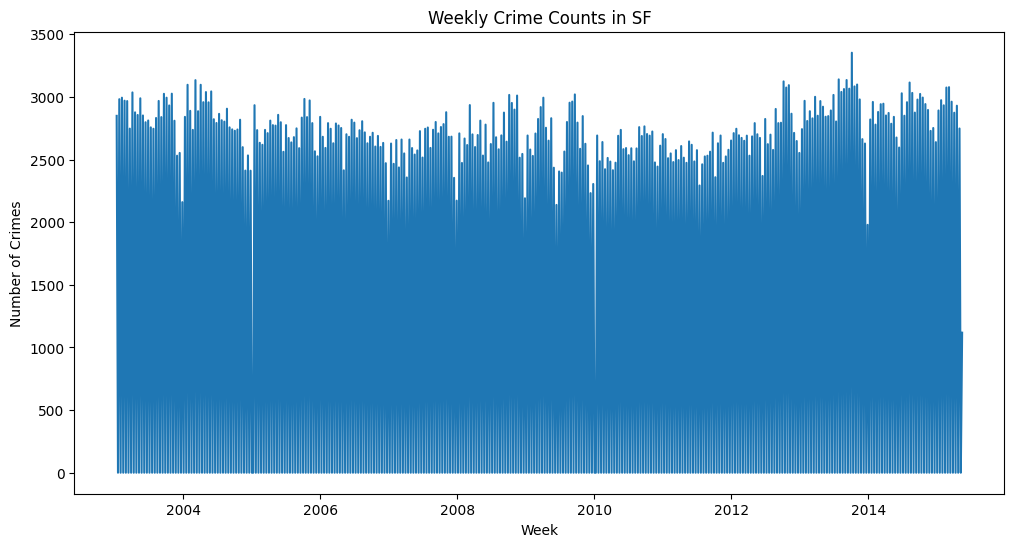

In [ ]:
# Convert DateOnly to datetime again for resampling
daily_counts['DateOnly'] = pd.to_datetime(daily_counts['DateOnly'])
weekly_counts = daily_counts.resample('W', on='DateOnly').sum().reset_index()

plt.figure(figsize=(12,6))
plt.plot(weekly_counts['DateOnly'], weekly_counts['count'])
plt.title('Weekly Crime Counts in SF')
plt.xlabel('Week')
plt.ylabel('Number of Crimes')
plt.show()
